# 步骤
- 1.登录支付宝开放平台控制台，点击研发服务：https://openhome.alipay.com/platform/developerIndex.htm
- 2.下载生成密钥的工具：https://opendocs.alipay.com/open/291/105971#%E5%8E%9F%E7%90%86%E4%BB%8B%E7%BB%8D
- 3.配置沙箱环境：https://openhome.alipay.com/platform/appDaily.htm?tab=info
    - 在沙箱应用中配置密钥。
        - 先通过下载到本地的密钥工具来生成秘钥，选择RSA2加密方式，然后会得到应用私钥和应用公钥
        - 然后在网页中点击配置，选择更换应用公钥，把你生成的应用公钥粘贴进去，保存设置
        - 又会分别得到支付宝公钥和应用私钥，把它们粘贴复制到服务器中，如下图所示：
        - 安装Alipay的SDK(pip install python-alipay-sdk --upgrade)，并到网址查看示例https://github.com/fzlee/alipay/blob/master/README.zh-hans.md
            - 其中appid是沙箱应用中的那个APPID
        - 示例代码：
                from alipay import AliPay, DCAliPay, ISVAliPay
                from alipay.utils import AliPayConfig
                import os
                from django.conf import settings
                app_private_key_string = open(os.path.join(settings.BASE_DIR, "keys", "app_private_key.txt"), "r").read()
                alipay_public_key_string = open(os.path.join(settings.BASE_DIR, "keys", "alipay_public_key.txt"), "r").read()
                subject = "测试订单"
                alipay = AliPay(
                    appid="2021000117602958",
                    app_notify_url=None,  # 默认回调url
                    app_private_key_string=app_private_key_string,
                    # 支付宝的公钥，验证支付宝回传消息使用，不是你自己的公钥,
                    alipay_public_key_string=alipay_public_key_string,
                    sign_type="RSA2",  # RSA 或者 RSA2,
                    debug = True,   # 默认False,沙箱环境要设置为True
                    config = AliPayConfig(timeout=30)  # 可选, 请求超时时间
                )

                # 手机网站支付，需要跳转到
                # 真实环境：https://openapi.alipay.com/gateway.do? + order_string
                # 沙箱环境：https://openapi.alipaydev.com/gateway.do? + order_string
                order_string = alipay.api_alipay_trade_wap_pay(
                    out_trade_no=order.pk,  #订单号
                    total_amount=str(order.total_price),  #商品总价
                    subject=subject,  # 商品名字
                    # 由于是沙箱环境，所以无需return_url和notify_url
                    return_url=None,   # 支付完成后跳转的网址
                    # notify_url=None    # 可选, 不填则使用默认notify url，支付成功后通知的网址
                )
                # 支付的网址
                pay_url = "https://openapi.alipaydev.com/gateway.do?" + order_string
                # 要将支付网址返回给前端进行调用
                return Response({"pay_url": pay_url})
        - 然后前端获取pay_url进行调用
                const pay_url = res.data.pay_url;
                // 获取到支付网址后，让它跳转到支付网址
                window.location = pay_url;
                
                测试用的账户是沙箱账户中提供的买家账号

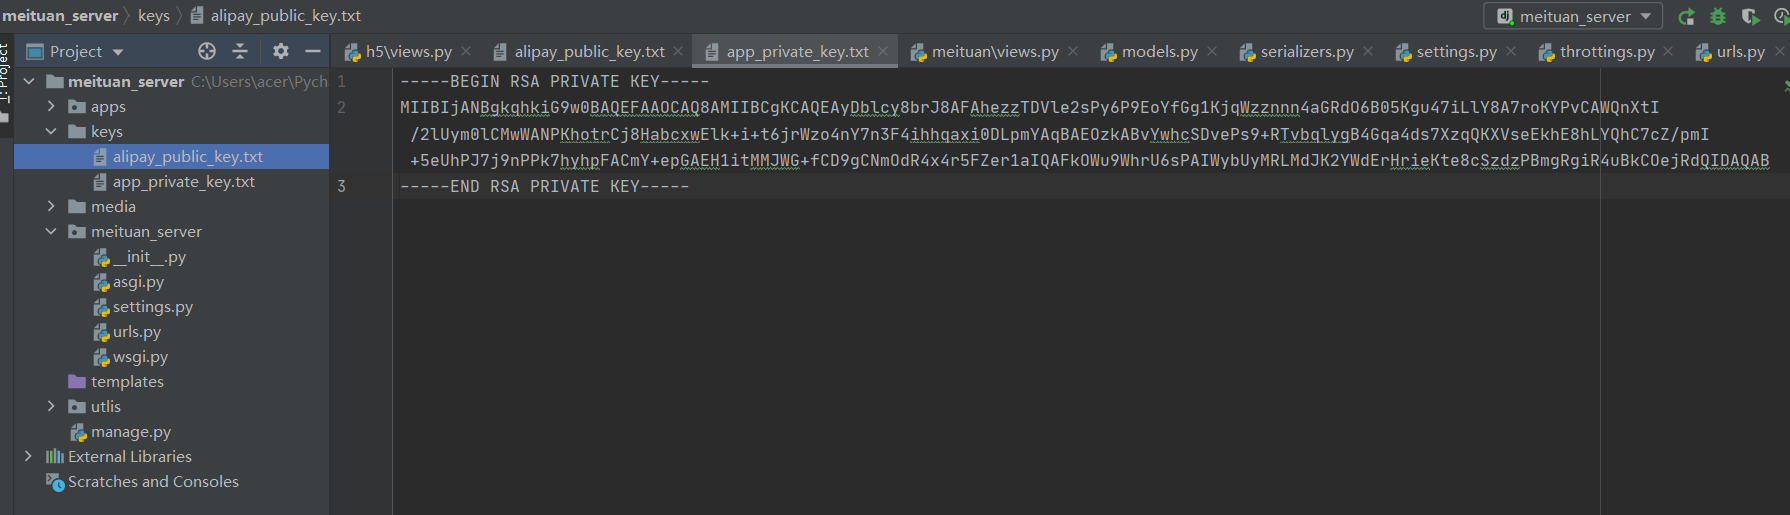

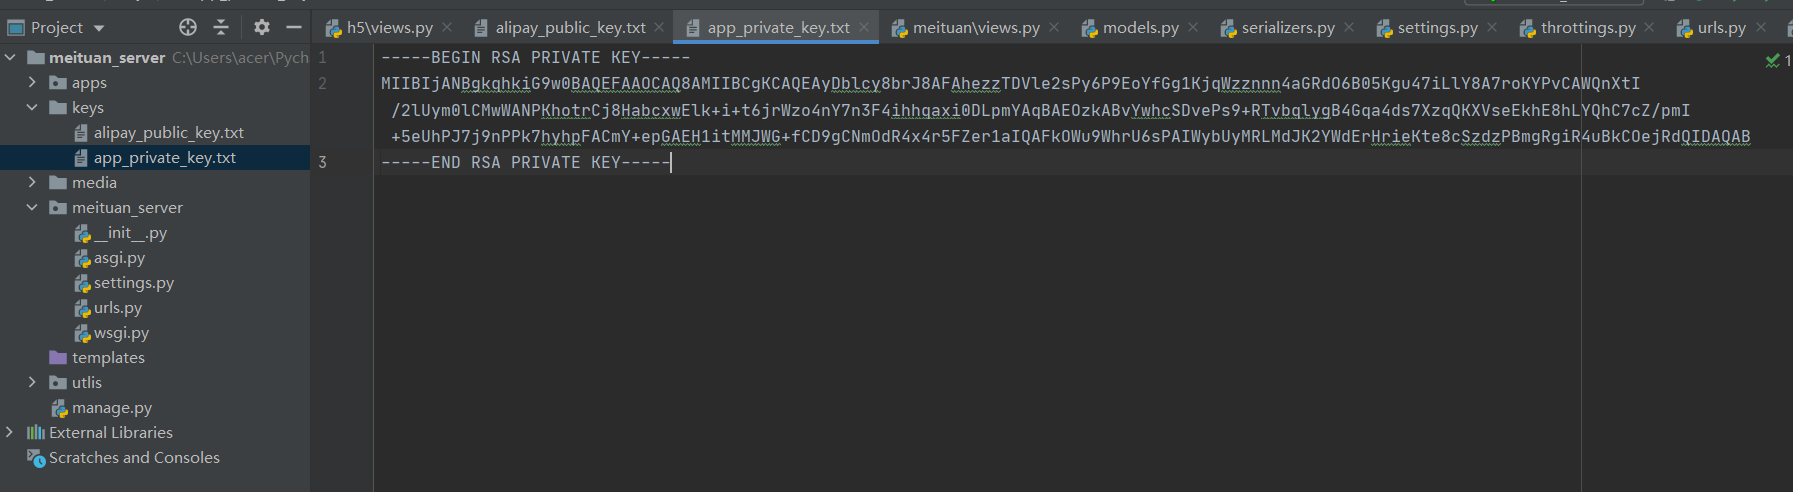